<a href="https://colab.research.google.com/github/1kruidenp/PRA3024/blob/master/Week_2_Interm_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is based off of to intermediate tutorials from the TESS github respository. The two tutorials (interm_tasc_lc and interm_tesscut_exomast) look at a tess project candidate (unconfirmed planets) using the TIC number of the stars they transitted and analyze several properties.

Below, the code has been adjusted from these tutorials. The code will be explained through commenting (in green) and every adjustment will be justified. Most of the code comes from interm_tesscut_exomast, only the last graph comes from the other tutorial, but has been adjusted to fit the format of the code used in the first tutorial.

This has been done for two different stars, where in part 2, only the adjustments will be commented, and the code will remain unexplained as they have been explained in part 1.

The code is based off of a tutorial written by author: Susan E. Mullally

In [23]:

#here correct packages are installed. 
!pip install astroquery
import numpy as np
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle #This was added to the code for the last part, where LombScargle is used to find the max freq.

%matplotlib inline





In [24]:
#Here, the information of the star being analyzed is retrieved. The catalog was installed above in the astroquery package. 
#Basic information given in the catalogue is then printed below.

ticid = 33878688 #this tic was adjusted for a new star.

starName = "TIC " + str(ticid)
radSearch = 4/60 #radius in degrees

catalogData = Catalogs.query_object(starName, radius = radSearch, catalog = "TIC")
ra = catalogData[0]['ra']
dec = catalogData[0]['dec']

# Print out the first row in the table
print( catalogData[:1]['ID', 'Tmag', 'Jmag', 'ra', 'dec', 'objType'] )

   ID      Tmag   Jmag         ra               dec        objType
-------- ------- ------ ---------------- ----------------- -------
33878688 11.1762 10.414 66.2222796813898 -73.3333453194796    STAR


In [25]:
#Within this block, nearby stars are looked for within the catalog. The number of nearby stars are printed below.

# Create a list of nearby bright stars (tess magnitude less than 14) from the rest of the data for later.
bright = catalogData['Tmag'] < 15

# Make it a list of Ra, Dec pairs of the bright ones. This is now a list of nearby bright stars.
nearbyStars = list( map( lambda x,y:[x,y], catalogData[bright]['ra'], catalogData[bright]['dec'] ) )
len(nearbyStars)

12

In [26]:
#Printed out are in which sectors on which camera TESS located the star. There are also 4 ccd's on each camera, so this is specified as well.

coord = SkyCoord(ra, dec, unit = "deg")

sectorTable = Tesscut.get_sectors(coord)
print(sectorTable)

  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0001-4-2      1      4   2
tess-s0002-4-2      2      4   2
tess-s0003-4-2      3      4   2
tess-s0004-4-2      4      4   2
tess-s0005-4-3      5      4   3
tess-s0006-4-3      6      4   3
tess-s0007-4-3      7      4   3
tess-s0008-4-4      8      4   4
tess-s0009-4-4      9      4   4
tess-s0010-4-4     10      4   4
tess-s0011-4-1     11      4   1
tess-s0012-4-1     12      4   1
tess-s0013-4-1     13      4   1


In [0]:
#this line retrieves data from the HDU at the specified coordinates specified in the block above.

hdulist = Tesscut.get_cutouts(coord, 20)

In [28]:
#The information retrieved before is printed out below this block, where 3 different files are printed.
hdulist[0].info()
hdulist[0][0].header['SECTOR']

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  PIXELS        1 BinTableHDU    279   1282R x 12C   [D, E, J, 400J, 400E, 400E, 400E, 400E, J, E, E, 38A]   
  2  APERTURE      1 ImageHDU        79   (20, 20)   int32   


1

In [29]:
#This done here as well, but for a different index.
hdulist[1].info()

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  PIXELS        1 BinTableHDU    279   1245R x 12C   [D, E, J, 400J, 400E, 400E, 400E, 400E, J, E, E, 38A]   
  2  APERTURE      1 ImageHDU        79   (20, 20)   int32   


In [0]:
#In the next two blocks we show a picture of the object being analyzed using the information from PIXELS on the HDU card. 
#In the first block the properties of the heat map are defined.

# Define a function to simplify the plotting command that we do repeatedly.
def plot_cutout(image):
    """
    Plot image and add grid lines.
    """
    plt.imshow(image, origin = 'lower', cmap = plt.cm.YlGnBu_r, 
           vmax = np.percentile(image, 92),
           vmin = np.percentile(image, 5))

    plt.grid(axis = 'both',color = 'white', ls = 'solid')

Text(0, 0.5, 'Image Row')

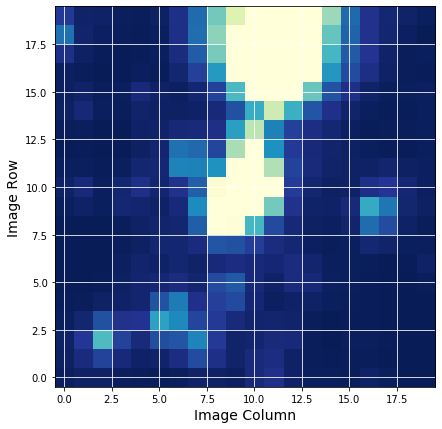

In [31]:
#Here the data is retrieved fromn the HDU and the data set is then plotted on the heat map below. The last lines of code label the axes.

hdu1 = hdulist[0]
firstImage = hdu1[1].data['FLUX'][0]

fig = plt.figure(figsize=(7, 7))
plot_cutout(firstImage)
plt.xlabel('Image Column',fontsize = 14)
plt.ylabel('Image Row',fontsize = 14)


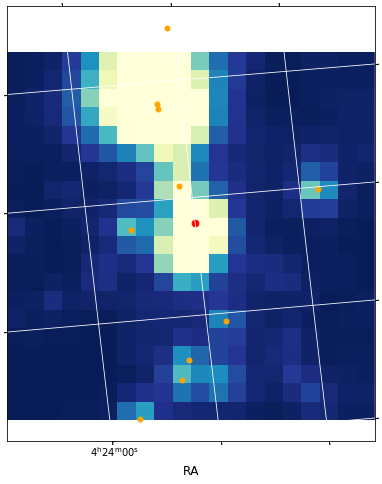

In [32]:
#Here a similar concept is done, but now the PIXEL of HDU[1] is taken instead of HDU[0]. 
#This will cause the image to look a little different, as it is taken from a different angle.
#The data is then plotted in a heat map again, but now it is centered to the main star which is being analyzed.

hdu2 = hdulist[1]

firstImage = hdu2[1].data['FLUX'][0]

wcs = WCS(hdu2[2].header) #no HDU 2

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(111, projection = wcs)
plot_cutout(firstImage)

plt.xlabel('RA', fontsize = 12)
plt.ylabel('Dec', fontsize = 12)


starloc = wcs.all_world2pix([[ra,dec]],0)  #Second is origin
plt.scatter(starloc[0,0], starloc[0,1],s = 45,color = 'red')

# Plot nearby stars as well, which we created using our Catalog call above.
nearbyLoc = wcs.all_world2pix(nearbyStars[1:],0)
plt.scatter(nearbyLoc[1:, 0], nearbyLoc[1:, 1], 
            s = 25, color = 'orange')

In [0]:
#Here two functions are created. The first applies a photometric aperture to one image. The second then does this for every image within the FLUX array.


def aperture_phot(image, aperture):
    """
    Sum-up the pixels that are in the aperture for one image.
    image and aperture are 2D arrays that need to be the same size.
    
    aperture is a boolean array where True means to include the light of those pixels.
    """
    flux = np.sum(image[aperture])

    return flux

def make_lc(flux_data, aperture):
    """
    Apply the 2d aperture array to the and time series of 2D images. 
    Return the photometric series by summing over the pixels that are in the aperture.
    
    Aperture is a boolean array where True means it is in the desired aperture.
    """
    
    flux = np.array(list (map (lambda x: aperture_phot(x, aperture), flux_data) ) )

    return flux


Text(0.5, 1.0, 'Flux in Photometric Aperture')

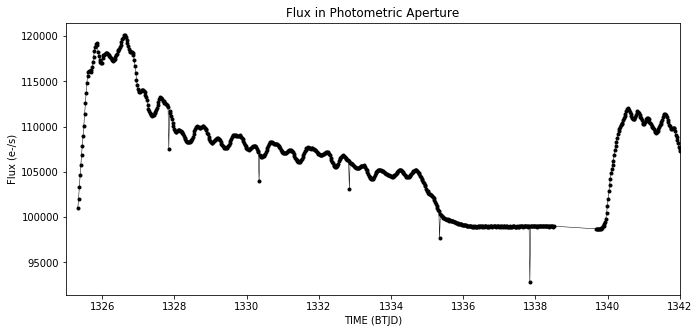

In [34]:
#Here the flux that is found in the block above is graphed. 
#Notice that there is a limit in time, this is because for a full plot, we will only have dat in this time range
#This is probably because this was when the TESS was recording the sector where this star was located.

# Use all pixels in our aperture.
aperture = hdu1[2].data == 1

flux1 = make_lc(hdu1[1].data['FLUX'], aperture)
time1 = hdu1[1].data['TIME']

plt.figure(figsize = (11,5))
plt.plot(time1, flux1, 'k.-', lw = .5)
plt.xlim(1325,1342)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Flux (e-/s)')
plt.title('Flux in Photometric Aperture')

Text(0.5, 1.0, 'Background Flux')

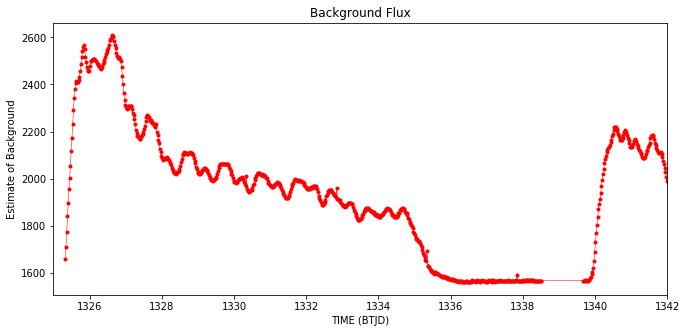

In [35]:
#Here the background flux is plotted, this is done by looking at the flux of the dimmer pixels.

# Plot the flux change of the dimmest pixels by using percentile.
bkgAperture = hdu1[1].data['FLUX'][0] < np.percentile(hdu1[1].data['FLUX'][0], 5)

bkgFlux1 = make_lc(hdu1[1].data['FLUX'], bkgAperture)
time1 = hdu1[1].data['TIME']

plt.figure(figsize = (11, 5))
plt.plot(time1, bkgFlux1, 'r.-', lw = .5)

plt.xlim(1325, 1342)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Estimate of Background')
plt.title('Background Flux')

Text(0.5, 1.0, 'Background Subtracted Flux')

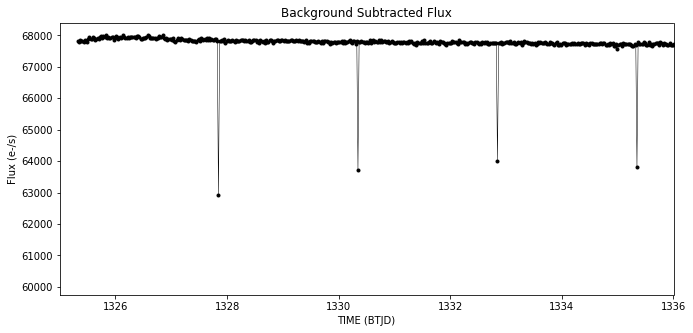

In [36]:

#Using the total flux found two blocks above, and the background flux right above, we can subtract the two to get the final flux of the star.

from scipy.signal import argrelextrema

bkgSubFlux = flux1 - (bkgFlux1 * np.sum(aperture) / np.sum(bkgAperture) )


plt.figure(figsize = (11,5))
plt.plot(time1, bkgSubFlux,'.-k', lw = 0.5)

plt.xlim(1325, 1336)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Flux (e-/s)')
plt.title('Background Subtracted Flux')





Text(0.5, 1.0, 'Periodogram(TIC33878688)')

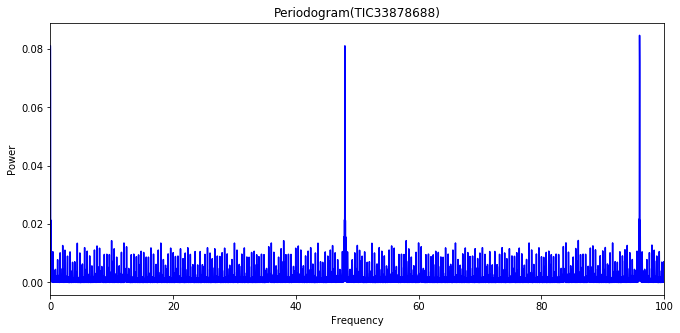

In [37]:

#This block is based off of code from interm_task_lc. 
#Here the frequency of the stars oscillation in flux is graphed. 
#This is done by looking at all the different frequencies at which it oscillates.
#If the trend is more repetetive, the "power" of the frequency will be stronger. 



frequency, power = LombScargle(time1, bkgSubFlux).autopower(maximum_frequency=100)


plt.figure(figsize= (11, 5))
                   

plt.plot(frequency, power,'b')


# Labeling the axes
plt.xlim(0,100)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Periodogram(TIC33878688)')



Text(0.5, 1.0, 'Periodogram(TIC33878688)')

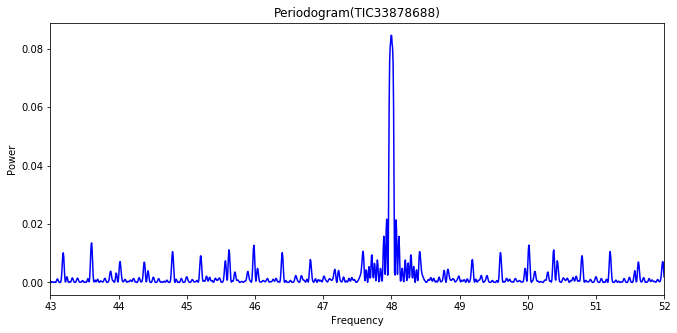

In [38]:
#In this final block the same is done, however it is zoomed in on the interesting frequency. 
#This is at 48, which means that 1/48 times an hour the star would have a sudden decrease in drop of flux. 
#If you change this to per day that would be about 0.5 times a day. 
#This is similar to what you see in the background subtracted flux graph, where there are 4 drops seen in about 8 days.
#This frequency could correspond to the orbital period of an unknown transitting star.

frequency, power = LombScargle(time1, bkgSubFlux).autopower(maximum_frequency=52)


plt.figure(figsize= (11, 5))
                   

plt.plot(frequency, power,'b')


# Labeling the axes
plt.xlim(43,52)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Periodogram(TIC33878688)')